In [282]:
import pandas
import warnings

warnings.simplefilter('ignore')

researched_country = 'Poland'

In [283]:
arrivals_data = pandas.read_csv('raw_data/raw_arrivals_data/arrivals_2020-2022.csv')

arrivals_data


,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_ARR_1,DLY_APT_ARR_1,DLY_APT_ARR_A_1,...,DLY_APT_ARR_R_1,DLY_APT_ARR_S_1,DLY_APT_ARR_T_1,DLY_APT_ARR_V_1,DLY_APT_ARR_W_1,DLY_APT_ARR_NA_1,FLT_ARR_1_DLY,FLT_ARR_1_DLY_15,ATFM_VERSION,Pivot Label
0,2020,1,JAN,1-Jan-2020,UDYZ,Zvartnots,Armenia,35,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v2,Zvartnots (UDYZ)
1,2020,1,JAN,1-Jan-2020,LELN,Leon,Spain,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v2,Leon (LELN)
2,2020,1,JAN,1-Jan-2020,EYSA,Šiauliai,Lithuania,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v2,Šiauliai (EYSA)
3,2020,1,JAN,1-Jan-2020,LFML,Marseille-Provence,France,93,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v2,Marseille-Provence (LFML)
4,2020,1,JAN,1-Jan-2020,LIMF,Torino Caselle,Italy,44,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v2,Torino Caselle (LIMF)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202350,2022,1,JAN,31-Jan-2022,LFRH,Lorient-Lann Bihoué,France,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v2,Lorient-Lann Bihoué (LFRH)
202351,2022,1,JAN,31-Jan-2022,EBBR,Brussels,Belgium,154,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v2,Brussels (EBBR)
202352,2022,1,JAN,31-Jan-2022,EDDE,Erfurt,Germany,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v2,Erfurt (EDDE)
202353,2022,1,JAN,31-Jan-2022,EIDL,Donegal,Ireland,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v2,Donegal (EIDL)


In [284]:
arrivals_data = arrivals_data.filter(["FLT_DATE", "APT_NAME", "STATE_NAME", "FLT_ARR_1"])
arrivals_data['FLT_DATE'] = pandas.to_datetime(arrivals_data['FLT_DATE'])
arrivals_data

,FLT_DATE,APT_NAME,STATE_NAME,FLT_ARR_1
0,2020-01-01,Zvartnots,Armenia,35
1,2020-01-01,Leon,Spain,2
2,2020-01-01,Šiauliai,Lithuania,1
3,2020-01-01,Marseille-Provence,France,93
4,2020-01-01,Torino Caselle,Italy,44
...,...,...,...,...
202350,2022-01-31,Lorient-Lann Bihoué,France,5
202351,2022-01-31,Brussels,Belgium,154
202352,2022-01-31,Erfurt,Germany,3
202353,2022-01-31,Donegal,Ireland,2


In [285]:
arrivals_data = arrivals_data.drop(arrivals_data[arrivals_data['STATE_NAME'] != researched_country].index)

arrivals_data

,FLT_DATE,APT_NAME,STATE_NAME,FLT_ARR_1
24,2020-01-01,Lublin,Poland,6
28,2020-01-01,Warszawa/ Chopina,Poland,203
55,2020-01-01,Katowice - Pyrzowice,Poland,29
59,2020-01-01,Poznan - Lawica,Poland,14
60,2020-01-01,Bydgoszcz,Poland,6
...,...,...,...,...
202240,2022-01-31,Rzeszow - Jasionka,Poland,4
202267,2022-01-31,Katowice - Pyrzowice,Poland,23
202274,2022-01-31,Gdansk,Poland,31
202282,2022-01-31,Lodz - Lublinek,Poland,1


(          date  arrivals
 0   2020-01-01       452
 1   2020-01-02       622
 2   2020-01-03       602
 3   2020-01-04       487
 4   2020-01-05       566
 ..         ...       ...
 757 2022-01-27       334
 758 2022-01-28       351
 759 2022-01-29       294
 760 2022-01-30       305
 761 2022-01-31       339
 
 [762 rows x 2 columns],
 <AxesSubplot:xlabel='date'>)

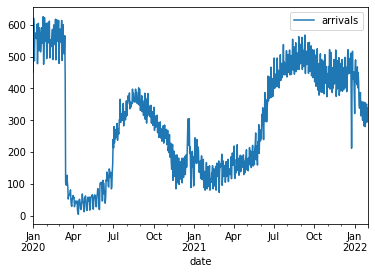

In [286]:
data_arrival_dict = dict()

for index, row in arrivals_data.iterrows():
    date = row['FLT_DATE']
    arrivals = row["FLT_ARR_1"]
    if date in data_arrival_dict:
        data_arrival_dict[date] += arrivals
    else:
        data_arrival_dict[date] = arrivals

arrivals_data = pandas.DataFrame(data_arrival_dict.items(), columns=['date', 'arrivals'])

arrivals_data['date'] = pandas.to_datetime(arrivals_data['date'])



arrivals_data, arrivals_data.plot(x = 'date')

(          date  arrivals
 0   2020-01-01       452
 1   2020-01-02       622
 2   2020-01-03       602
 3   2020-01-04       487
 4   2020-01-05       566
 ..         ...       ...
 775 2022-02-14       190
 776 2022-02-15       162
 777 2022-02-16       171
 778 2022-02-17       191
 779 2022-02-18       202
 
 [780 rows x 2 columns],
 <AxesSubplot:xlabel='date'>)

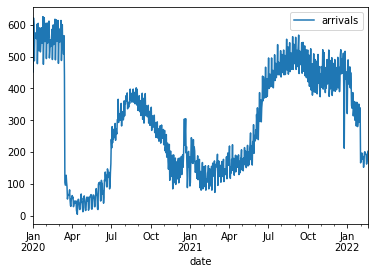

In [287]:
#adding recent flight data
recent = pandas.read_csv('raw_data/raw_arrivals_data/arrivals_recent.csv')
recent['date'] = pandas.to_datetime(recent['date'])
recent
arrivals_data = arrivals_data.append(recent, ignore_index=True)
arrivals_data, arrivals_data.plot(x = 'date')

In [288]:
covid_data = pandas.read_csv('raw_data/covid_data_raw.csv')

covid_data 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138936,ZWE,Africa,Zimbabwe,2021-12-05,139046.0,523.0,727.857,4710.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138937,ZWE,Africa,Zimbabwe,2021-12-06,139046.0,0.0,688.571,4710.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138938,ZWE,Africa,Zimbabwe,2021-12-07,141601.0,2555.0,996.571,4713.0,3.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138939,ZWE,Africa,Zimbabwe,2021-12-08,150628.0,9027.0,2184.429,4720.0,7.0,1.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [289]:
covid_data = covid_data.filter(['location', 'date', 'new_cases'])

covid_data

,location,date,new_cases
0,Afghanistan,2020-02-24,5.0
1,Afghanistan,2020-02-25,0.0
2,Afghanistan,2020-02-26,0.0
3,Afghanistan,2020-02-27,0.0
4,Afghanistan,2020-02-28,0.0
...,...,...,...
138936,Zimbabwe,2021-12-05,523.0
138937,Zimbabwe,2021-12-06,0.0
138938,Zimbabwe,2021-12-07,2555.0
138939,Zimbabwe,2021-12-08,9027.0


In [290]:
covid_data = covid_data.drop(covid_data[covid_data['location'] != researched_country].index)
covid_data['new_cases'] = covid_data['new_cases'].astype(int)

covid_data

,location,date,new_cases
100382,Poland,2020-03-04,1
100383,Poland,2020-03-05,0
100384,Poland,2020-03-06,4
100385,Poland,2020-03-07,0
100386,Poland,2020-03-08,6
...,...,...,...
101023,Poland,2021-12-05,22394
101024,Poland,2021-12-06,13250
101025,Poland,2021-12-07,19369
101026,Poland,2021-12-08,28549


(       location       date  new_cases
 100382   Poland 2020-03-04          1
 100383   Poland 2020-03-05          0
 100384   Poland 2020-03-06          4
 100385   Poland 2020-03-07          0
 100386   Poland 2020-03-08          6
 ...         ...        ...        ...
 101023   Poland 2021-12-05      22394
 101024   Poland 2021-12-06      13250
 101025   Poland 2021-12-07      19369
 101026   Poland 2021-12-08      28549
 101027   Poland 2021-12-09      27459
 
 [646 rows x 3 columns],
 <AxesSubplot:xlabel='date'>)

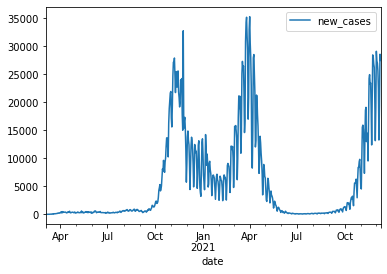

In [291]:
covid_data['date'] = pandas.to_datetime(covid_data['date'])

covid_data, covid_data.plot(x = 'date')

In [292]:
# adding recent covid data

recent = pandas.read_csv('raw_data/covid_recent.csv')
recent['date'] = pandas.to_datetime(recent['date'])
covid_data = covid_data.append(recent, ignore_index=True)

In [293]:
covid_data = covid_data.drop('location', 1)

merged_data = arrivals_data.merge(covid_data, on='date')

merged_data

,date,arrivals,new_cases
0,2020-03-04,558,1
1,2020-03-05,585,0
2,2020-03-06,614,4
3,2020-03-07,488,0
4,2020-03-08,537,6
...,...,...,...
711,2022-02-13,194,20027
712,2022-02-14,190,12233
713,2022-02-15,162,19847
714,2022-02-16,171,25670


<AxesSubplot:xlabel='date'>

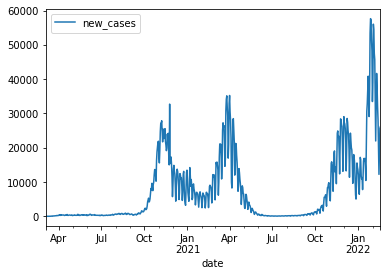

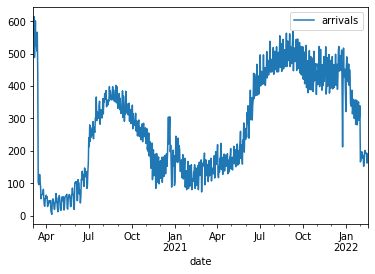

In [294]:
merged_data.plot(x = 'date', y = 'new_cases')
merged_data.plot(x = 'date', y = 'arrivals')

In [295]:
complete_data = merged_data.drop('date', axis=1)
complete_data.index = merged_data['date']

complete_data

,arrivals,new_cases
date,,
2020-03-04,558,1
2020-03-05,585,0
2020-03-06,614,4
2020-03-07,488,0
2020-03-08,537,6
...,...,...
2022-02-13,194,20027
2022-02-14,190,12233
2022-02-15,162,19847


In [296]:
data_split_coefficient = 0.9

train = complete_data[:int(data_split_coefficient * (len(complete_data)))]

train

,arrivals,new_cases
date,,
2020-03-04,558,1
2020-03-05,585,0
2020-03-06,614,4
2020-03-07,488,0
2020-03-08,537,6
...,...,...
2021-12-03,491,26961
2021-12-04,391,25575
2021-12-05,409,22394


In [297]:
valid = complete_data[int(data_split_coefficient * (len(complete_data))):]

valid

,arrivals,new_cases
date,,
2021-12-08,431,28549
2021-12-09,426,27459
2021-12-10,498,24988
2021-12-11,402,23762
2021-12-12,418,19450
...,...,...
2022-02-13,194,20027
2022-02-14,190,12233
2022-02-15,162,19847


rmse: 90.08153561294478


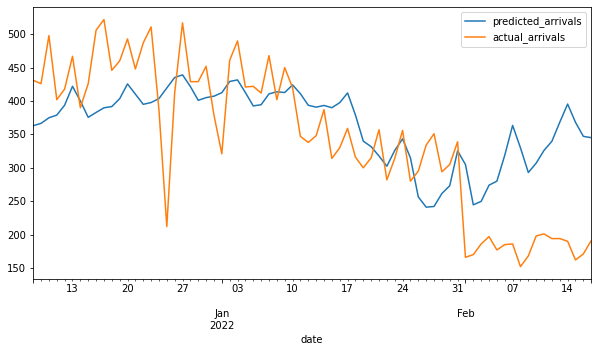

In [305]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

def SARIMAX_model(train):
    model = SARIMAX(endog=train.drop('new_cases', axis=1), exog=train['new_cases'])
    model_fit = model.fit()

    return model_fit

test_model = SARIMAX_model(train)

result = test_model.forecast(steps=len(valid), exog=valid['new_cases'])

predicted_arrivals = pandas.DataFrame(result)

predicted_arrivals.plot(figsize=(10,5))
valid['arrivals'].plot()
plt.legend(["predicted_arrivals", "actual_arrivals"])

rmse = math.sqrt(mean_squared_error(predicted_arrivals["predicted_mean"], valid["arrivals"]))
print(f'rmse: {rmse}')

In [299]:
future_covid_data = pandas.read_csv('raw_data/covid_forecast_artificial.csv')
future_covid_data['date'] = pandas.to_datetime(future_covid_data['date'])
future_covid_data

,date,cases
0,2022-02-18,23018
1,2022-02-19,21420
2,2022-02-20,19904
3,2022-02-21,18474
4,2022-02-22,17123
5,2022-02-23,15860
6,2022-02-24,14676
7,2022-02-25,13569
8,2022-02-26,12534
9,2022-02-27,11572


<AxesSubplot:xlabel='date'>

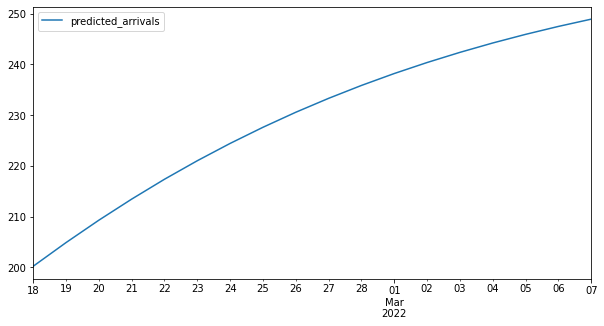

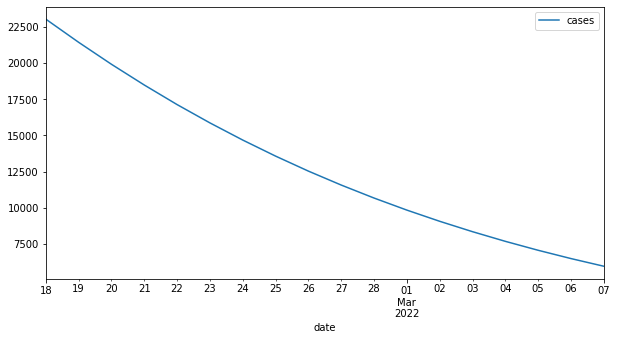

In [309]:
# future_covid_data = covid_data.drop(covid_data[covid_data['date'] <= arrivals_data['date'].iat[-1]].index)
# future_covid_data = df

exog_covid = future_covid_data.drop('date', axis=1)
exog_covid.index = future_covid_data['date']



prediction_model = SARIMAX_model(complete_data)


result = prediction_model.forecast(steps=len(exog_covid), exog = exog_covid)


prediction = pandas.DataFrame(result)

prediction.plot(figsize=(10, 5))
plt.legend(["predicted_arrivals"])
exog_covid.plot(figsize=(10, 5))

# update train data until the first day of forecast
